In [27]:
import pandas as pd 
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../data/CS Course Enrollment Data.csv')

In [3]:
# assign id to each row
df['id'] = range(1, len(df) + 1)

In [15]:
# pivot table from wide to long
melted_df = pd.melt(df, id_vars=['Semester Admitted', 'Department', 'Major', 'id'], var_name='Class_Semester', value_name='Taken')

# filter out NaN rows
melted_df = melted_df.dropna(subset=['Taken', 'Department', 'Major'])

# split 'Class_Semester' into 'Class' and 'Semester'
melted_df[['Class', 'Semester_Type']] = melted_df['Class_Semester'].str.split('_', n=1, expand=True)
melted_df = melted_df.drop(columns=['Class_Semester'])

# split Semester_Type into Pass or Tran
melted_df[['Type', 'Garbage']] = melted_df['Semester_Type'].str.split('_', n=1, expand=True)
melted_df = melted_df.drop(columns=['Garbage', 'Semester_Type'])

# Display the first few rows to verify
melted_df.sort_values(by='id').head(10)

,Semester Admitted,Department,Major,id,Taken,Class,Type
66375,Fall 2017,Mechanical Engineering,Mechanical Engineering,1,Spring 2011,CSCI261,Pass
73751,Fall 2017,Electrical Enginrg & Comp Sci,Engineering - Electrical,2,Fall 2009,CSCI261,Tran
66377,Fall 2017,Non-Degree Program Grad Level,Non-degree Graduate,3,Spring 2010,CSCI261,Pass
66378,Fall 2017,Geophysics,Geophysical Engineering,4,Spring 2010,CSCI261,Pass
66379,Fall 2017,Civil & Environmental Enginrng,Engineering - Environmental,5,Spring 2010,CSCI261,Pass
66380,Fall 2017,Physics,Mechanical Engineering,6,Spring 2012,CSCI261,Pass
66381,Fall 2017,Mechanical Engineering,Mechanical Engineering,7,Spring 2013,CSCI261,Pass
7,Fall 2017,Geo & Geological Engineering,Geological Engineering - M/FEx,8,Spring 2013,CSCI101,Pass
66383,Fall 2017,Economics and Business,Environmental Engineering,9,Spring 2015,CSCI261,Pass
73759,Fall 2017,Applied Math & Statistics,Computational & Applied Math,10,Fall 2013,CSCI261,Tran


# Validation

In [26]:
print("DEPARTMENTS:")
print("\t", melted_df['Department'].unique(), '\n')

print("MAJORS:")
print("\t", melted_df['Major'].unique(), '\n')

print("CLASSES:")
print("\t", melted_df['Class'].unique(), '\n')

print("SEMESTERS:")
print("\t", melted_df['Taken'].unique(), '\n')

DEPARTMENTS:
	 ['Geo & Geological Engineering' 'Mechanical Engineering' 'Physics'
 'Economics and Business' 'Civil & Environmental Enginrng' 'Chemistry'
 'Chemical & Biological Engineer' 'Geophysics'
 'Engineering Design & Society' 'Electrical Enginrg & Comp Sci'
 'Metallurgical & Materials Eng' 'Undecided' 'Computer Science'
 'Electrical Engineering' 'Petroleum' 'Applied Math & Statistics' 'Mining'
 'Interdisciplinary Program' 'Non-Degree Program Undergrad' 'Honors'
 'Non-Degree Program Grad Level' 'Humanities Arts Social Science'
 'Engineering' 'Environ Science & Engineering' 'Mathematics'] 

MAJORS:
	 ['Geological Engineering - M/FEx' 'Mechanical Engineering'
 'Engineering Physics' 'Economics - Business' 'Environmental Engineering'
 'Biochemistry' 'CHE-Biological Enginrng Spclty' 'Geophysical Engineering'
 'EG-Individualized Spclty' 'Civil Engineering' 'Electrical Engineering'
 'Engineering & Tech Management' 'Metallurgical & Materials Eng'
 'Geological Engineering - GTch' 'Chemical

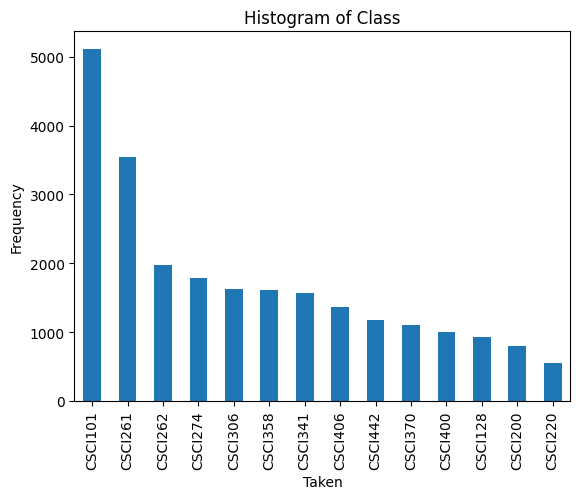

In [29]:
# plot histogram of different Taken 
melted_df['Class'].value_counts().plot(kind='bar')
plt.title('Histogram of Class')
plt.xlabel('Taken')
plt.ylabel('Frequency')
plt.show()
